![header](img/logos_header2.png)

# GMES and Africa - Copernicus Marine Services Capacity Building

<div style="text-align: right"><i> 01-CBM-PRODUCT-MAPS </i></div>

***
<center><h1> Earth Observation for Coral Bleaching Monitoring :</h1> <h2>Producing maps of Sea Surface Temperature derived products</h2></center>

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Run" and select "Run All Above Selected Cell".<br>
***

# Table of contents
- [1. Introduction](#1.-Introduction)
- [2. About the data](#2.-About-the-data)
    - [2.1. Sea Surface Temperature (SST) data](#2.1.-Sea-Surface-Temperature-(SST)-data)
- [3. Download the data and manage NetCDF files](#3.-Download-the-data-and-manage-NetCDF-files)
- [4. Hands on : use Python and load SST data](#4.-Hands-on-:-use-Python-and-load-SST-data)
    - [4.1. Required Python modules](#4.1.-Required-Python-modules) 
    - [4.2. Load the data products](#4.2.-Load-the-data-products)
    - [4.3. Plot the climatology data](#4.3.-Plot-the-climatology-data)
    - [4.4. Deriving the SST and Daily SST Climatology products](#4.4.-Deriving-the-SST-and-Daily-SST-Climatology-products)
    - [4.5. Deriving the Degree Heating Weeks and Bleaching Alert Area products](#4.5.-Deriving-the-Degree-Heating-Weeks-and-Bleaching-Alert-Area-products)
- [5. Conclusion](#5.-Conclusion) 

# 1. Introduction
[Go back to the "Table of contents"](#Table-of-contents)

Water temperature is one of the cruicial water quality parameters for growth and survival of marine organisms, with different organisms having different optimal and tolerable ranges. The water temperature also relates to the solubility of dissolved gasses (e.g. oxygen and carbon dioxide) and resulting pH. 

From a satellite perspective some sensors are capable of monitoring the surface layer of the ocean, known as the Sea Surface Temperature or SST.

The methodology used to derive the Coral Bleaching Monitoring products is based upon those developed by [NOAA Coral Reef Watch](https://coralreefwatch.noaa.gov/main/). Please note: The climatology data used in this practical are derived from different SST data and over a different time period than what NOAA uses. It is possible to use the NOAA climatologies instead - it will just require you to regrid the climatology to the same grid as the SST used to create the derived products. 

# 2. About the data

[Go back to the "Table of contents"](#Table-of-contents)

We are going to analyse the foundation sea surface temperature data for the area of the Red Sea
 

| Parameter | Value |
| :---: | :---|
| **Frequency** | daily-mean |
| **Lat min** | 12 |
| **Lat max** | 30 |
| **Lon min** | 32 |
| **Lon max** | 44 |
| **Timesteps** | from 2023-01-01 to 2024-09-01 |


## 2.1. Sea Surface Temperature (SST) data
[Go back to the "Table of contents"](#Table-of-contents)

*Variables used :* analysed_sst *(Sea surface foundation temperature)*

***

*Product identifier* : [SST_GLO_SST_L4_NRT_OBSERVATIONS_010_001](https://data.marine.copernicus.eu/product/SST_GLO_SST_L4_NRT_OBSERVATIONS_010_001/description)

*Spatial resolution* : 0.05° x 0.05°

*Temporal resolution* : daily mean

*Description* : The Operational Sea Surface Temperature and Ice Analysis (OSTIA) system is run by the UK's Met Office and delivered by IFREMER PU. For the Global Ocean - the OSTIA global foundation Sea Surface Temperature product provides daily gap-free maps of: Foundation Sea Surface Temperature at 0.05° x 0.05° horizontal grid resolution, using in-situ and satellite data from both infrared and microwave radiometers. This product provides the foundation Sea Surface Temperature, which is the temperature free of diurnal variability.  OSTIA uses satellite data provided by the GHRSST project together with in-situ observations to determine the sea surface temperature.

**For detailed information about the product, please consult the document:** [Product User Manual (PUM)](https://catalogue.marine.copernicus.eu/documents/PUM/CMEMS-SST-PUM-010-001.pdf)

**For information about the quality of the product, please consult the document:** [Quality Information Document (QUID)](https://catalogue.marine.copernicus.eu/documents/QUID/CMEMS-SST-QUID-010-001.pdf)

# 3. Download the data and manage NetCDF files

[Go back to the "Table of contents"](#Table-of-contents)

There are multiple ways to access the OSTIA SST data in the DUNIA platform. Some of the data are located under  <code>/eodata/CMEMS/REP/NRT/SST/SST_GLO_SST_L4_NRT_OBSERVATIONS_010_001</code>, but in this case you will have to load in multiple netcdf files and subset to your region of interest. 

Another option is to use the your copernicus marine service login information together with the <code>copernicusmarine</code> toolbox, and to download a spatial and temporal subset of the dataset. 

For this notebook we have prepared a spatio-temporal subset, obtained using the Copernicus Marine Toolbox. The dataset can be found in the same folder as this notebook


# 4. Hands on : use Python and load SST data
## 4.1. Required Python modules
[Go back to the "Table of contents"](#Table-of-contents)

First, the notebook must be set up with all the necessary tools available from the Jupyter Notebook Ecosystem. Most of these are already inluded in the DUNIA sandbox.

| Module name | Description |
| :---: | :---|
| **numpy** | [NumPy](https://numpy.org/) is the fundamental package for scientific computing with Python and for managing ND-arrays |
| **xarray** | [Xarray](http://xarray.pydata.org/en/stable/) introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience |
| **matplotlib** |[Matplotlib](https://matplotlib.org/) is a Python 2D plotting library which produces publication quality figures |
| **cartopy** |[Cartopy](https://scitools.org.uk/cartopy/docs/latest/index.html/) is a library for plotting maps and geospatial data analyses in Python |

<div class="alert alert-block alert-success"

<b> Importing modules </b>
* Unlike MATLAB, Python libraries need to be *imported* before they can be used
* Imported libraries usually have a namespace
* Portions of libraries, can be imported

In [1]:
import numpy as np
import copernicusmarine
import xarray
import CBM_utilities as cbm
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import pandas as pd

# Import libraries
import os

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches

import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# To avoid warning messages
import warnings
warnings.filterwarnings('ignore')

On the first attempt to run this notebook you might find that a <code>ModuleNotFoundError</code> appears in a red box below. This just means that you need to install the missing module(s). To do this, you use the <code>!pip install module-name</code>. We recommend you remove the # from the next line and run it once, after which all the modules should be installed. Remember to re-run the import cell above in order to make sure that everything is imported correctly.

In [2]:
#!pip install numpy xarray matplotlib cartopy copernicusmarine

## 4.2. Load the data products


[Go back to the "Table of contents"](#Table-of-contents)

We are now all set to start loading the downloaded dataset. We will also just load our specific region of interest by using the "slice" fuction:

In [3]:
%%time
## load in the OSTIA SST data:
data = xarray.open_dataset("METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2_analysed_sst_32.03E-43.97E_12.02N-29.98N_2023-01-01-2024-09-01.nc")
lat = data.latitude.data
lon = data.longitude.data

## load in the climatology data:
clim_mean = xarray.open_dataset("redsea_sst_mean_clim.nc")
clim_max = xarray.open_dataset("redsea_max_monthly_mean.nc")

CPU times: user 567 ms, sys: 1.34 s, total: 1.91 s
Wall time: 512 ms


Let's see what the downloaded file looks like:

In [4]:
data

<xarray.Dataset> Size: 422MB
Dimensions:       (time: 610, latitude: 360, longitude: 240)
Coordinates:
  * latitude      (latitude) float32 1kB 12.02 12.07 12.12 ... 29.88 29.92 29.98
  * longitude     (longitude) float32 960B 32.03 32.08 32.12 ... 43.92 43.97
  * time          (time) datetime64[ns] 5kB 2023-01-01 2023-01-02 ... 2024-09-01
Data variables:
    analysed_sst  (time, latitude, longitude) float64 422MB ...
Attributes: (12/48)
    Conventions:                CF-1.4, ACDD-1.3
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    WARNING Some applications are unable to prope...
    creator_email:              enquiries@metoffice.gov.uk
    ...                         ...
    time_coverage_end:          20240119T000000Z
    time_coverage_start:        20240118T000000Z
    title:                      Global SST & Sea Ice Analysis, L4 OSTIA, 0.05...
    uuid:                       536d4865-f5a8-45b2-806f-1f1db491069a
    westernmost_longitude:      -180.0
    copernicusmarine_version:   1.2.4

You can see that the dataset contains one variable called "analysed_sst", it covers just the latitudes and longitudes of the Red Sea, and spans a time range of 2023-01-01 to 2024-09-01 (which is 610 individual time steps)


## 4.3. Plot the climatology data

[Go back to the "Table of contents"](#Table-of-contents)

Let's take a look at the climatology datasets: these datasets are required for the calculations of the derived Coral Bleaching Monitoring products. There is a *monthly climatology* and a *max monthly mean climatology*. Both datasets cover the exact same spatial extent and resolution as our near real time SST dataset. However, the climatologies were derived from the long-term reprocessed OSTIA dataset (Product ID: [SST_GLO_SST_L4_NRT_OBSERVATIONS_010_011](https://data.marine.copernicus.eu/product/SST_GLO_SST_L4_REP_OBSERVATIONS_010_011/description)) covering the period of 1995-01-01 to 2015-12-31. 

The *monthly climatology* represents the per-pixel mean SST per month over all years between and including 1995 and 2015. The date range used to create this climatology can be adjusted according to your research questions. The resulting product has the same latitude and longitude dimensions as our SST dataset, but with only 12 time steps representing the months of the year. This climatology dataset is used to derive the **Daily SST Climatology** and **SST anomaly** product. 

The *max monthly mean climatology* represents the per-pixel maximum SST of the *monthly climatology*. This climatology dataset is used to derive the **Hotspots**, **Degree Heating Weeks**, and **Bleaching Alert Area** products

Let's plot the monthly climatology for the Red Sea. This allows us to see what the expected temperature distributions in the Red Sea are  throughout the year, based on the mean of a historical time period. 

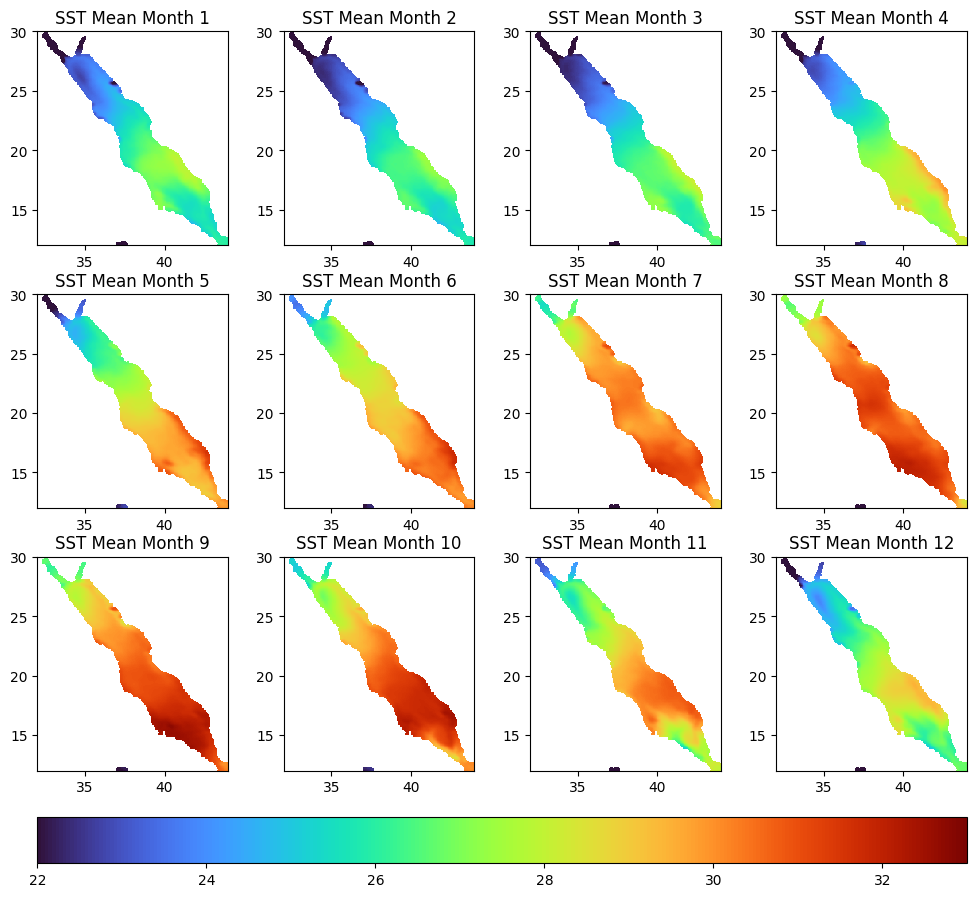

In [5]:
nrow = 3
ncol = 4
fig, axs = plt.subplots(nrow, ncol,figsize=(10, 10))
for i, ax in enumerate(fig.axes):
    CS = ax.pcolor(lon, lat, clim_mean.analysed_sst[i,:,:].data-273.15, vmin=22, vmax=33, cmap='turbo')
    ax.set_title('SST Mean Month '+str(i+1),fontsize=12)
    #ax.set_ylabel(str(i))
fig.tight_layout()
cbar = fig.colorbar(CS, ax=axs[:], location='bottom', pad=0.05)
plt.show()

As you can see the northern parts of the Red Sea are generally slightly cooler than the southern reaches, and the peak temperatures tend to occur during September (month 9). 

Next let's see how these compare to the *max monthly mean (MMM) climatology*, a single product map that represents the maximum value of each pixel of the *monthly climatology* map (it will probably look very similar to the map of September). 

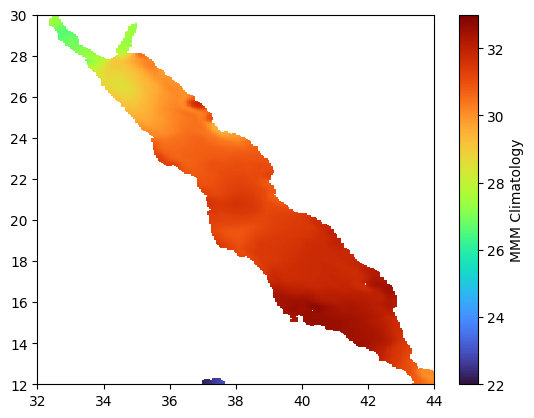

In [6]:
fig, ax = plt.subplots()
im = ax.pcolor(lon, lat, clim_max.analysed_sst.values-273.15, vmin=22, vmax=33, cmap='turbo')
fig.colorbar(im, ax=ax, label='MMM Climatology')

## 4.4. Deriving the SST and Daily SST Climatology products

[Go back to the "Table of contents"](#Table-of-contents)

Firstly let's select a date in the range **between 2023-04-01 and 2024-09-01** for which we will plot the different CBM products.

(Note that we need to have 12 weeks of data available before the selected date in order to be able to calculate the Degree Heating Weeks product)

In [7]:
## input date of interest in the format "YYYY-MM-DD"
target_date = "2024-08-30"

We can then use <code>xarray</code> functionality to select the specific date from the SST dataset, giving us the observed SST for that date:

In [8]:
# get the SST for the selected target date:
sst_array = data.sel(time=target_date).analysed_sst.values

Next we can calculate the **Daily Climatology**, which is calculated using a linear interpolation between the 15th of each month surrounding any given date. It might sound complicated, but the methodology is built into a pre-defined function in the <code>CBM_utilities.py</code> script, which we imported as <code>cbm</code>


In [9]:
# get the daily climatology for the target date:
date_mean_clim = cbm.get_daily_sst_clim(clim_mean, target_date)


Next we use the observed sea surface temperature and the daily climatology product to derive the **SST Anomaly** product, which tells us whether the observed temperatures were either cooler or warmer than expected for that particular day of the year. 


In [10]:
# derive the sst anomaly for the target date:
date_anomaly = sst_array - date_mean_clim

Next we derive the **Hotspots** products, which represents only positive anomalies in the observed SST compared to the *Max Monthly Mean (MMM) Climatology*

In [11]:
# derive the hotspots for the target date:
hotspotcalc = sst_array - clim_max.analysed_sst.values
hotspots = np.where(hotspotcalc>=0, hotspotcalc, 0) 

Now we can plot the SST product, and see how it compares to the SST climatology for that date. We are making use of the <code>cartopy</code> package to project the data and to include some [Natural Earth Features](https://www.naturalearthdata.com/features/) like coastlines, country borders, and rivers.

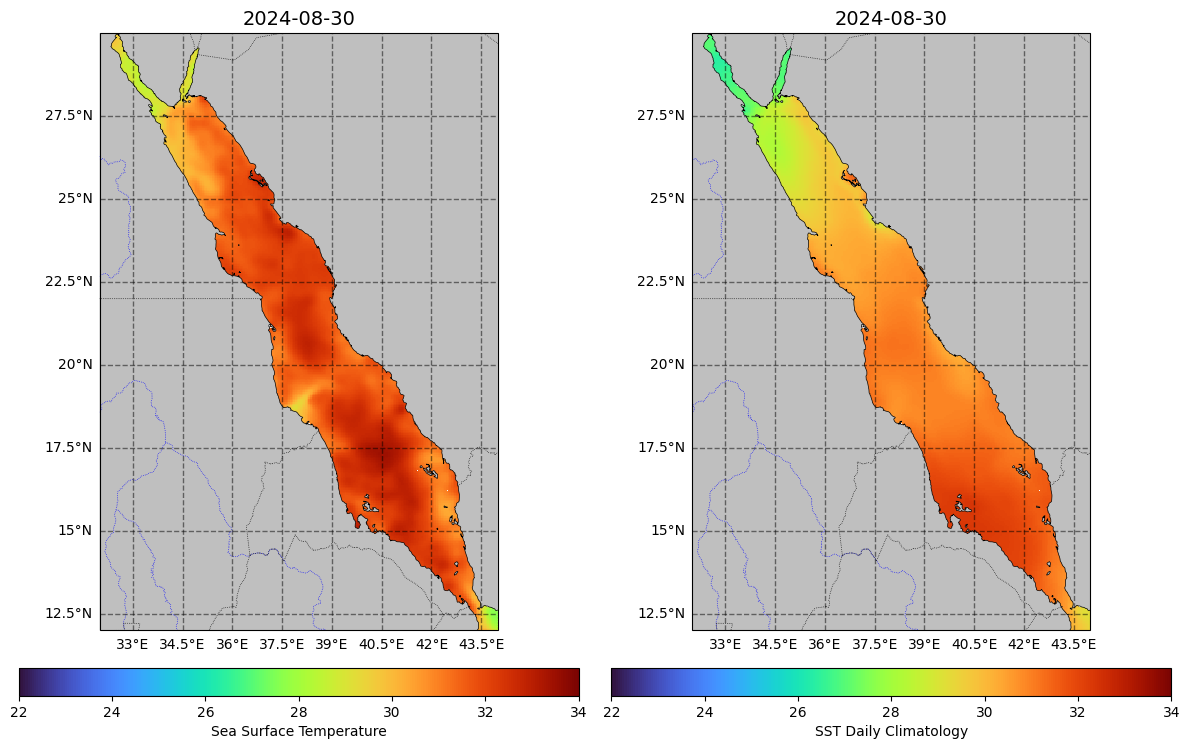

In [12]:
## define the projection and any additional natural earth features:
coord = ccrs.PlateCarree()

land_hires = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                          edgecolor='k', facecolor='0.75')
rivers = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines','10m', 
                                      facecolor='none', edgecolor='blue')

fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(121, projection=coord)
CS = ax.pcolor(lon, lat, sst_array-273.15, vmin=22, vmax=34, cmap='turbo')
ax.set_title(target_date,fontsize=14)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="k", alpha=0.5, linestyle="--")
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylines = True
gl.xlines = True
ax.add_feature(land_hires, linewidth=0.5) 
ax.add_feature(rivers, linewidth=0.5,linestyle=':')
ax.add_feature(cfeature.BORDERS, linewidth=0.5,linestyle=':')
cbar = fig.colorbar(CS, ax=ax, location='bottom', pad=0.05,label='Sea Surface Temperature')

ax = fig.add_subplot(122, projection=coord)
CS = ax.pcolor(lon, lat, date_mean_clim-273.15, vmin=22, vmax=34, cmap='turbo')
ax.set_title(target_date,fontsize=14)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="k", alpha=0.5, linestyle="--")
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylines = True
gl.xlines = True
ax.add_feature(land_hires, linewidth=0.5) 
ax.add_feature(rivers, linewidth=0.5,linestyle=':')
ax.add_feature(cfeature.BORDERS, linewidth=0.5,linestyle=':')
#ax.set_extent([39, 42, -5.1, -1.6], crs=coord);
cbar = fig.colorbar(CS, ax=ax, location='bottom', pad=0.05,label='SST Daily Climatology')

plt.tight_layout()

See if you can spot any differences between the "actual" SST (left), and the climatologically "expected" SST (right). Are there areas that are warmer or cooler than expected? Let's see how these warmer or cooler areas compare to the SST anomalies and Hotspot products:

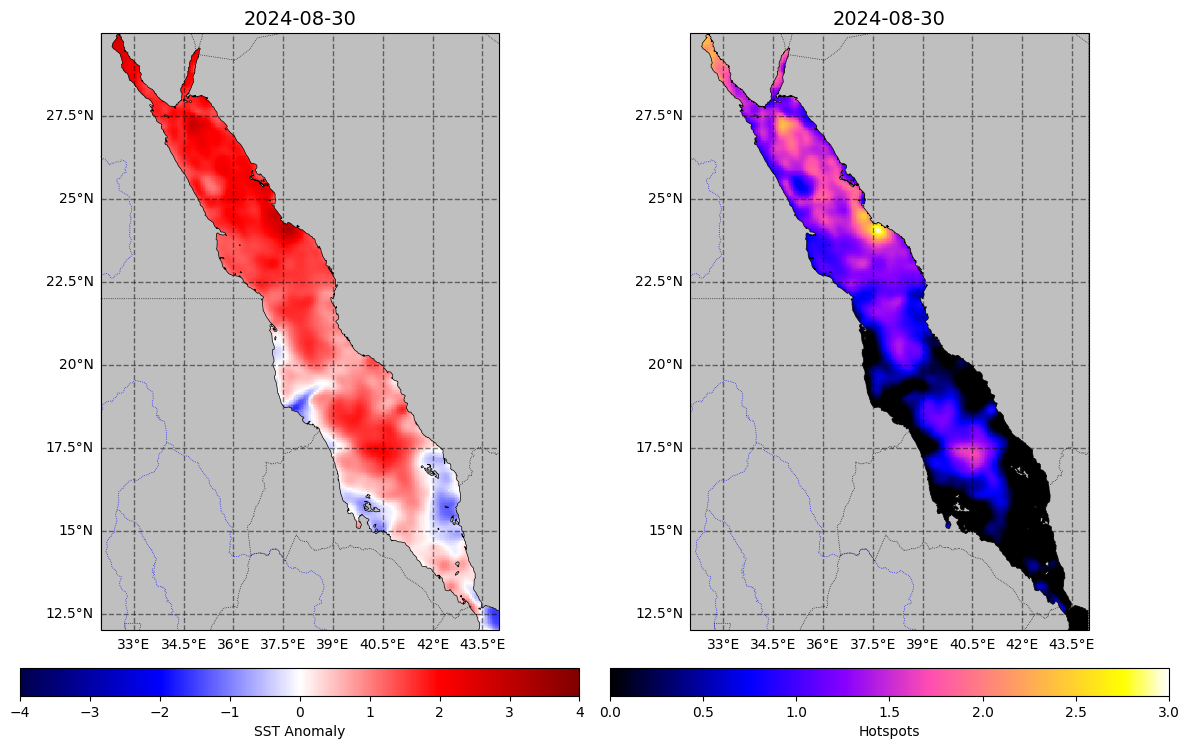

In [13]:
fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(121, projection=coord)
CS = ax.pcolor(lon, lat, date_anomaly, vmin=-4, vmax=4, cmap='seismic')
ax.set_title(target_date,fontsize=14)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="k", alpha=0.5, linestyle="--")
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylines = True
gl.xlines = True
ax.add_feature(land_hires, linewidth=0.5) 
ax.add_feature(rivers, linewidth=0.5,linestyle=':')
ax.add_feature(cfeature.BORDERS, linewidth=0.5,linestyle=':')
cbar = fig.colorbar(CS, ax=ax, location='bottom', pad=0.05,label='SST Anomaly')

ax = fig.add_subplot(122, projection=coord)
CS = ax.pcolor(lon, lat, hotspots, vmin=0, vmax=3, cmap='gnuplot2')
ax.set_title(target_date,fontsize=14)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="k", alpha=0.5, linestyle="--")
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylines = True
gl.xlines = True
ax.add_feature(land_hires, linewidth=0.5) 
ax.add_feature(rivers, linewidth=0.5,linestyle=':')
ax.add_feature(cfeature.BORDERS, linewidth=0.5,linestyle=':')
cbar = fig.colorbar(CS, ax=ax, location='bottom', pad=0.05,label='Hotspots')

plt.tight_layout()

## 4.5. Deriving the Degree Heating Weeks and Bleaching Alert Area products

[Go back to the "Table of contents"](#Table-of-contents)

Now we move on to the **Degree Heating Week (DHW)** product (with units of °C-weeks), which shows the accumulation of prolonged heat stress, represented by conditions warmer than 1°C above the highest summertime mean temperature (MMM), over a window period of 12 weeks.

In [14]:
## Calculate the degree heating weeks:
td = datetime.strptime(target_date, '%Y-%m-%d') 

start_date = td - timedelta(days=84)
end_date = td - timedelta(days=1)

sst_slice = data.sel(time=slice(start_date, end_date))

avail_dates = sst_slice.time

hotspots_84 = np.zeros((sst_slice.analysed_sst.shape)) * np.nan
hotspots_over1 = np.zeros((sst_slice.analysed_sst.shape)) * np.nan
idx = 0
for date in avail_dates:
    ts = pd.to_datetime(date.values) 
    datestr = ts.strftime('%Y-%m-%d')
    sst_array = data.sel(time=date).analysed_sst.values
    #date_max_clim = cbm.get_daily_sst_clim(clim_max, datestr)
    #hotspot_date = sst_array - date_max_clim
    hotspot_date = sst_array - clim_max.analysed_sst.values
    hotspots_84[idx,:,:] = np.where(hotspot_date>=0, hotspot_date, 0) 
    hotspots_over1[idx,:,:] = np.where(hotspot_date>=1, hotspot_date, 0) 
    idx = idx+1
    
dhw = np.nansum(hotspots_over1, axis=0) / 7

And lastly there is the **Bleaching Alert Area (BAA)** product, which provides a summary of the information provided in the DHW and Hotspot products, relating to heat stress. While there used to be only Alert Levels 1 and 2, [NOAA Coral Reef Watch](https://coralreefwatch.noaa.gov/product/5km/tutorial/crw11a_baa.php) recently updated their Bleaching Alert Levels to include Levels 3-5 according to the following criteria: 

<div>
<center><img src="img/BAA_levels.png" width="700"/></center>
</div>


In [15]:
## Calculate the bleaching alert area (based on hotspots and dhw):
bleaching_area = np.zeros((dhw.shape)) * np.nan
bleaching_area[np.where(hotspots <= 0)] = 0
bleaching_area[np.where(np.logical_and(hotspots > 0, hotspots < 1))] = 1
bleaching_area[np.where(np.logical_and(hotspots >= 1,  np.logical_and(dhw>0, dhw<4)))] = 2
bleaching_area[np.where(np.logical_and(hotspots >= 1,  np.logical_and(dhw>=4, dhw<8)))] = 3
bleaching_area[np.where(np.logical_and(hotspots >= 1,  np.logical_and(dhw>=8, dhw<12)))] = 4
bleaching_area[np.where(np.logical_and(hotspots >= 1,  np.logical_and(dhw>=12, dhw<16)))] = 5
bleaching_area[np.where(np.logical_and(hotspots >= 1,  np.logical_and(dhw>=16, dhw<20)))] = 6
bleaching_area[np.where(np.logical_and(hotspots >= 1, dhw>=20))] = 7

Ok then let's plot the DHW and BAA products

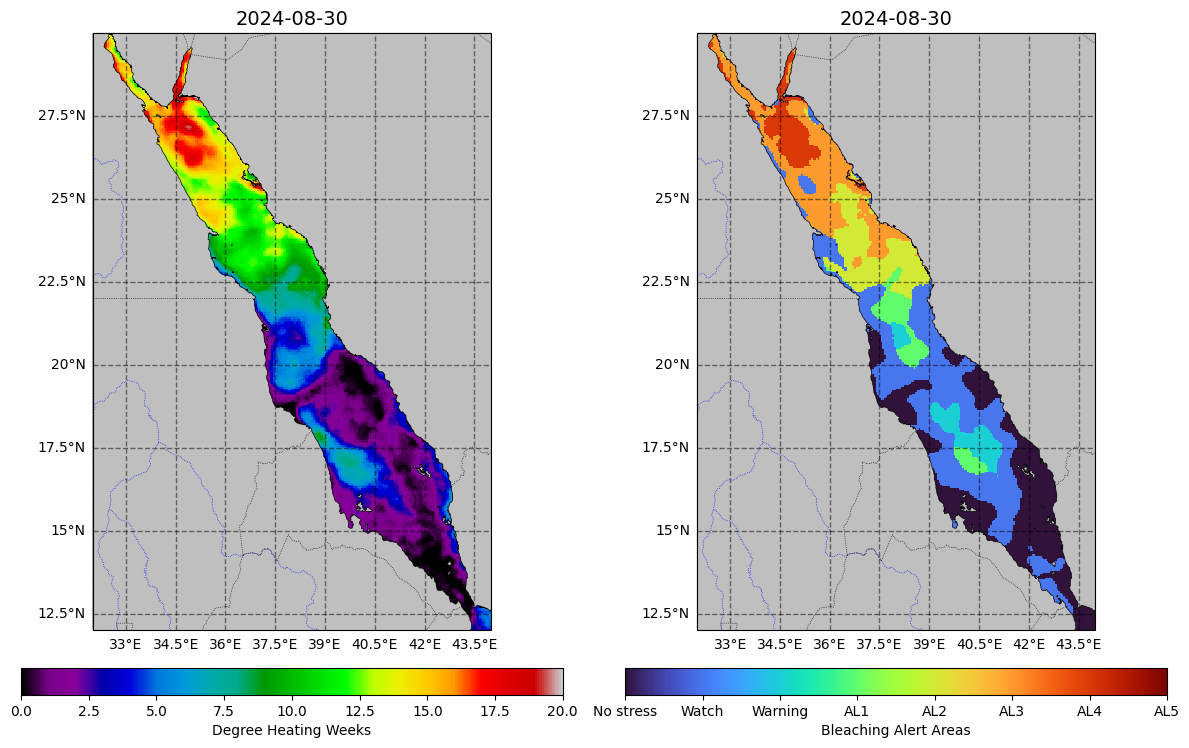

In [16]:
fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(121, projection=coord)
CS = ax.pcolor(lon, lat, dhw, vmin=0, vmax=20, cmap='nipy_spectral')
ax.set_title(target_date,fontsize=14)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="k", alpha=0.5, linestyle="--")
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylines = True
gl.xlines = True
ax.add_feature(land_hires, linewidth=0.5) 
ax.add_feature(rivers, linewidth=0.5,linestyle=':')
ax.add_feature(cfeature.BORDERS, linewidth=0.5,linestyle=':')
cbar = fig.colorbar(CS, ax=ax, location='bottom', pad=0.05,label='Degree Heating Weeks')

ax = fig.add_subplot(122, projection=coord)
CS = ax.pcolor(lon, lat, bleaching_area, vmin=0, vmax=7, cmap='turbo')
ax.set_title(target_date,fontsize=14)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="k", alpha=0.5, linestyle="--")
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylines = True
gl.xlines = True
ax.add_feature(land_hires, linewidth=0.5) 
ax.add_feature(rivers, linewidth=0.5,linestyle=':')
ax.add_feature(cfeature.BORDERS, linewidth=0.5,linestyle=':')
cbar = fig.colorbar(CS, ax=ax, location='bottom', pad=0.05,label='Bleaching Alert Areas')
ticks = [0,1,2,3,4,5,6,7]
cbar.set_ticks(ticks)
cbar.set_ticklabels(['No stress','Watch','Warning','AL1','AL2','AL3','AL4','AL5'])

plt.tight_layout()

<div class="alert alert-block alert-info">
<b>Exercise</b><br>
    
---
    
Try to reproduce the output figures for a different target date - you might want to use the climatology maps to see which are the cooler and hotter months. You can then compare the outputs from the two different dates.  
    
</div> 

# 5. Conclusion

[Go back to the "Table of contents"](#Table-of-contents)

This exercise has shown you how to load and plot SST data downloaded from Copernicus Marine Services, and how to derive the relevant satellite SST derived Coral Bleaching Monitoring products. You are now also able to plot these products to a map.


<div class="alert alert-block alert-success">
    <b>Congratulations ! </b><br>
  
--- 

This training notebook is over and you can now investigate Satellite SST data and plot the derived Coral Bleaching Monitoring products! In the other Jupyter Notebook of this training you will plot these products over time. Take a look!